<a href="https://colab.research.google.com/github/MargowoN2705/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/data_sets(1).xlsx',sheet_name='loan_approval')

In [ ]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
len(data[' loan_status'])

4269

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
matrix_corr = data.copy()
matrix_corr = matrix_corr.drop(columns=['loan_id'])

matrix_corr[' education'] = matrix_corr[' education'].map({' Graduate': 1, ' Not Graduate': 0})
matrix_corr[' loan_status'] = matrix_corr[' loan_status'].map({' Approved': 1, ' Rejected': 0})
matrix_corr.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
matrix_corr[' self_employed'] = matrix_corr[' self_employed'].map({' Yes': 1, ' No': 0})
matrix_corr.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
matrix_corr_actual = matrix_corr.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

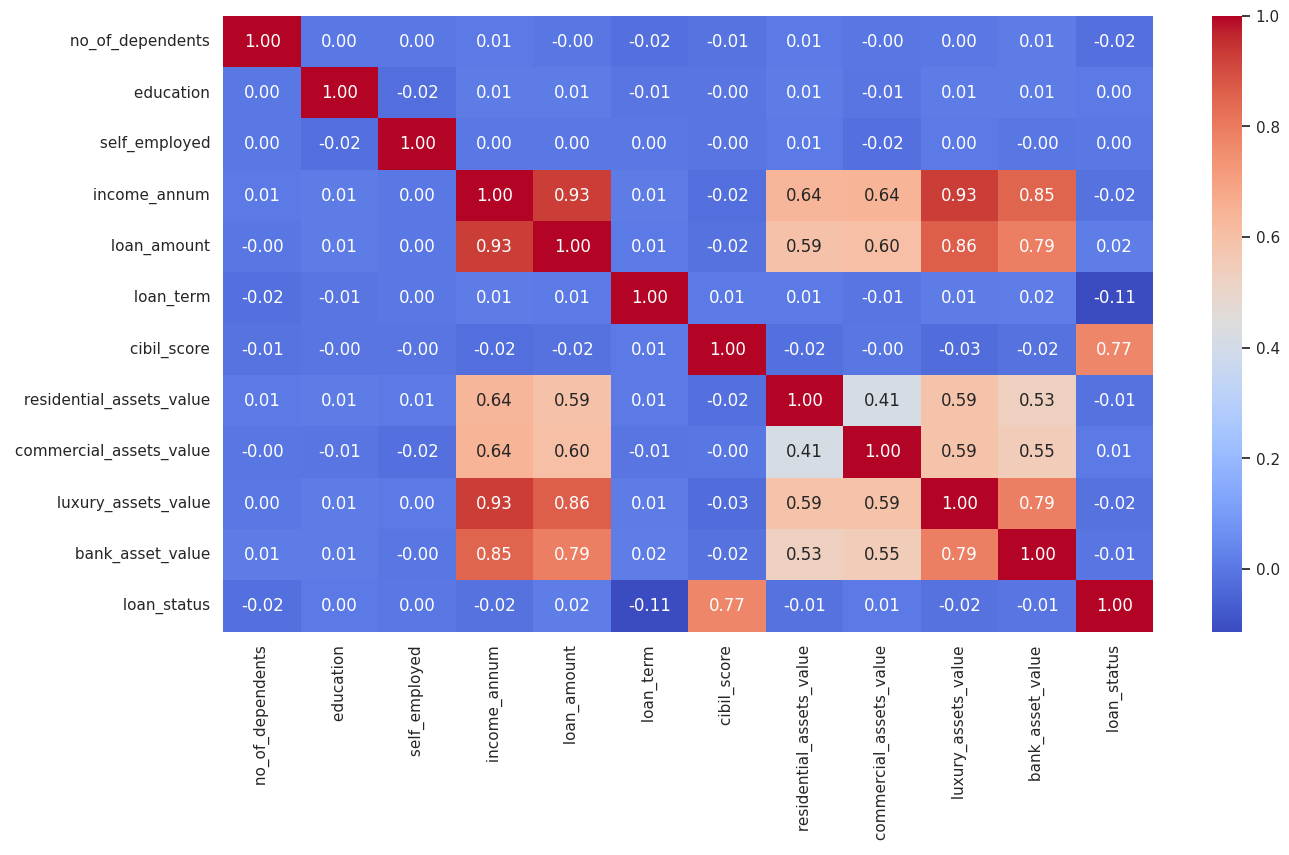

In [ ]:
sns.set(rc={'figure.figsize': (15, 8)})


sns.heatmap(matrix_corr_actual, annot=True, cmap='coolwarm', fmt='.2f')


plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

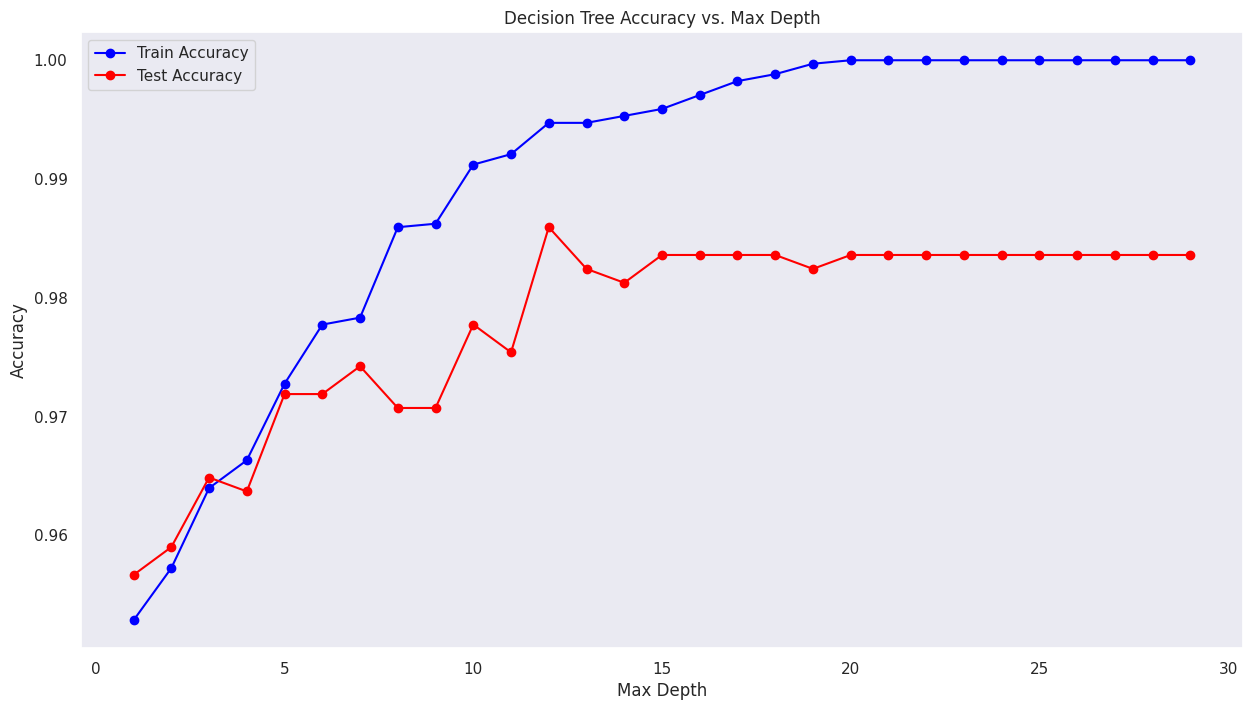

In [ ]:
loan_data = matrix_corr.copy()
X = loan_data.drop(columns=[' loan_status'])
y = loan_data[' loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
test_accuracies = []

for i in range(1, 30):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42,criterion='entropy')
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_pred = tree.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, test_pred))
    impurity = tree.tree_.impurity


plt.plot(range(1, 30), train_accuracies, marker='o', linestyle='-', label='Train Accuracy', color='blue')
plt.plot(range(1, 30), test_accuracies, marker='o', linestyle='-', label='Test Accuracy', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid()
plt.show()


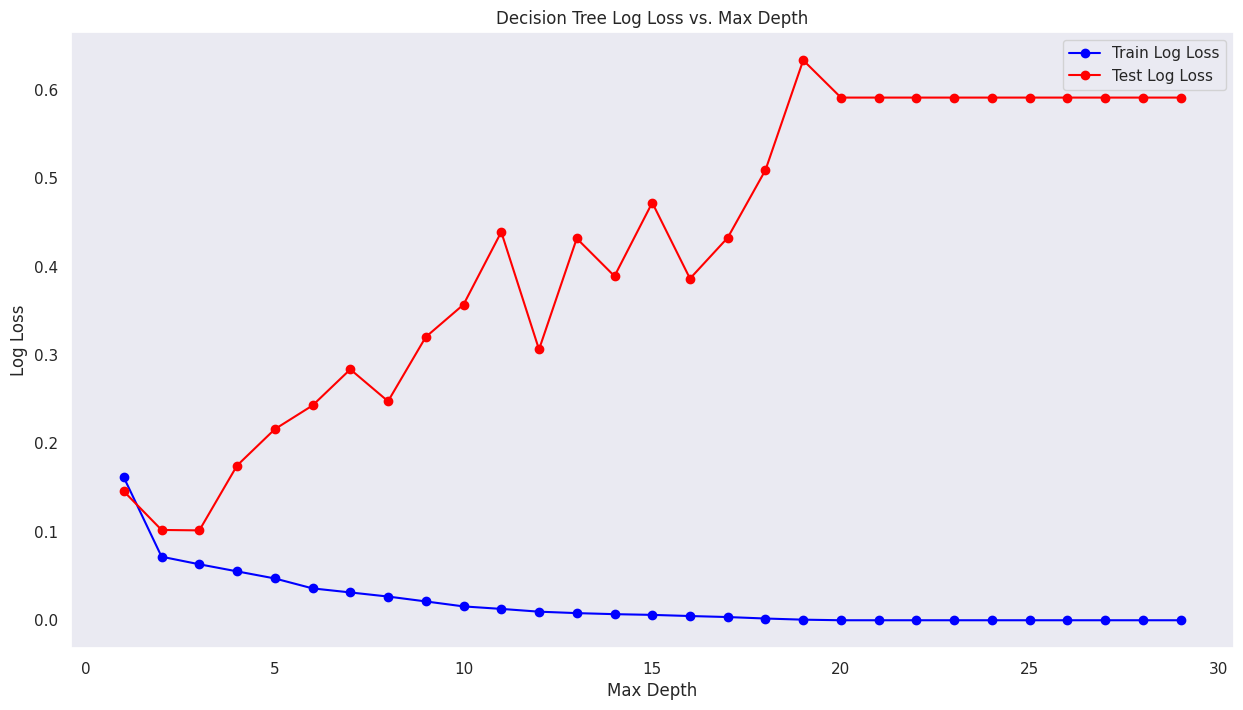

In [ ]:
from sklearn.metrics import log_loss


train_losses = []
test_losses = []

for i in range(1, 30):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42, criterion='entropy')
    tree.fit(X_train, y_train)

    train_prob = tree.predict_proba(X_train)
    test_prob = tree.predict_proba(X_test)

    train_loss = log_loss(y_train, train_prob)
    test_loss = log_loss(y_test, test_prob)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

best_depth = np.argmin(test_losses) + 1

plt.plot(range(1, 30), train_losses, marker='o', linestyle='-', label='Train Log Loss', color='blue')
plt.plot(range(1, 30), test_losses, marker='o', linestyle='-', label='Test Log Loss', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Log Loss')
plt.title('Decision Tree Log Loss vs. Max Depth')
plt.legend()
plt.grid()
plt.show()

In [ ]:
best_depth

3

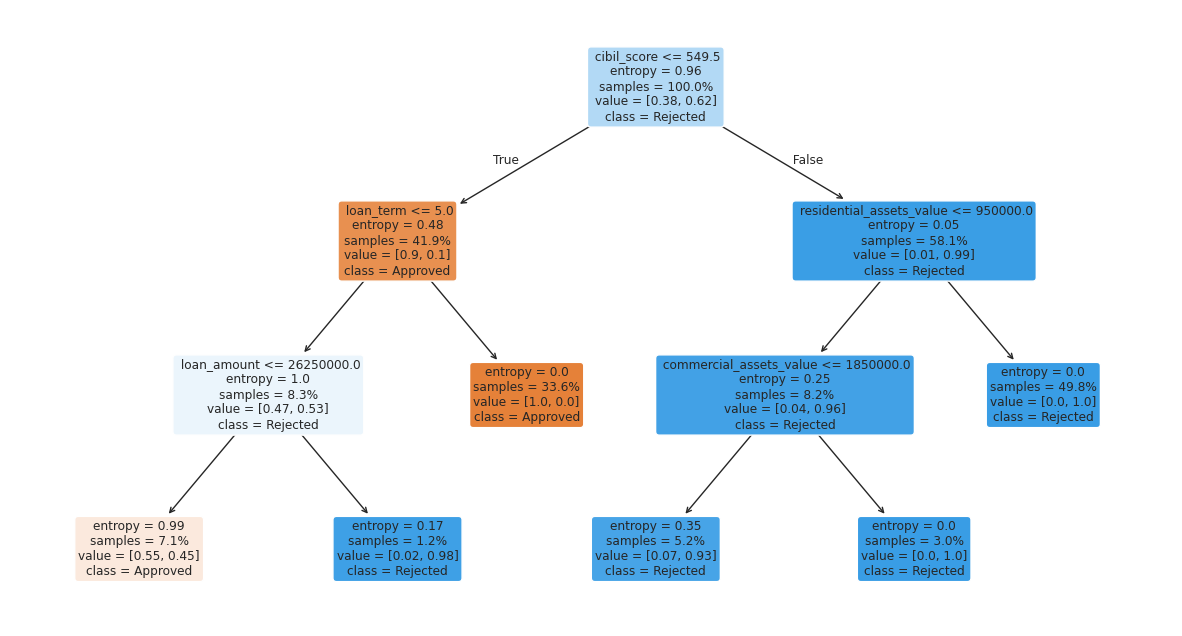

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42, criterion='entropy')
best_tree.fit(X_train, y_train)
plot_tree(best_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Approved', 'Rejected'],
          proportion=True,
          rounded=True,
          precision=2)
plt.show()

In [ ]:
credit_data = matrix_corr.copy()
credit_data = credit_data.drop(columns=[' cibil_score'])
X = credit_data.drop(columns=[' loan_status'])
y = credit_data[' loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

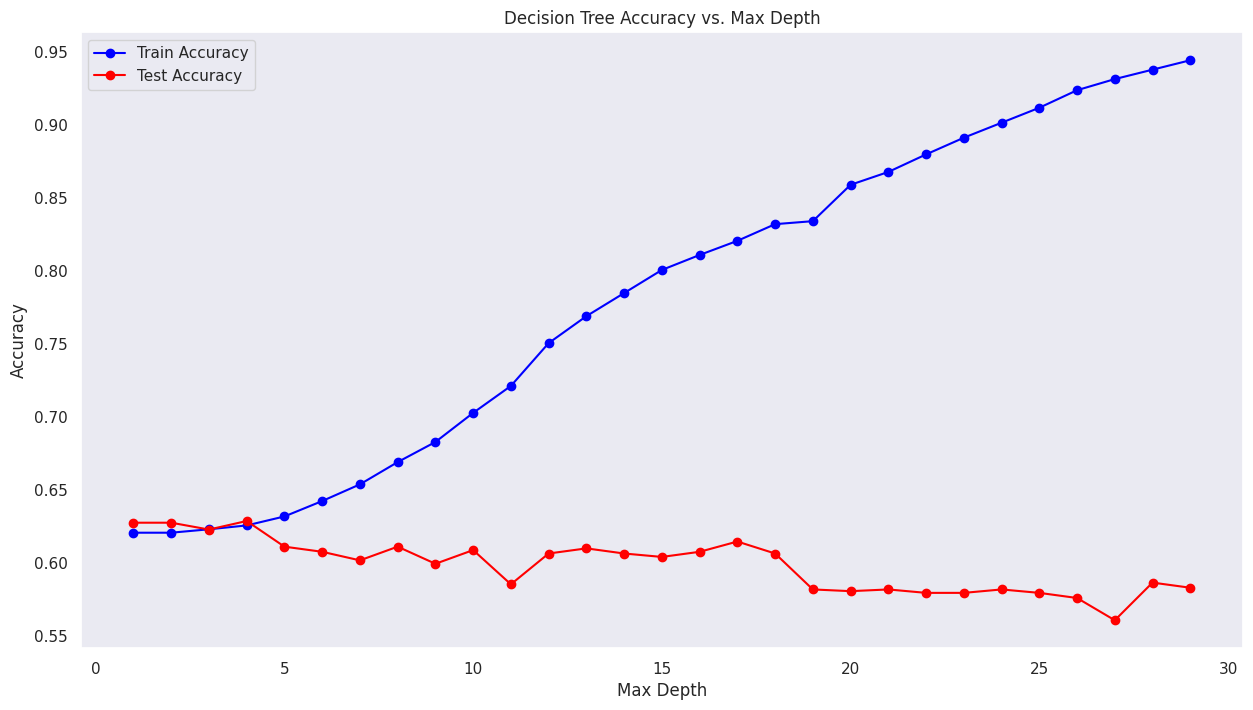

In [ ]:
credit_data
X = credit_data.drop(columns=[' loan_status'])
y = credit_data[' loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
test_accuracies = []

for i in range(1, 30):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42,criterion='entropy')
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_pred = tree.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, test_pred))
    impurity = tree.tree_.impurity


plt.plot(range(1, 30), train_accuracies, marker='o', linestyle='-', label='Train Accuracy', color='blue')
plt.plot(range(1, 30), test_accuracies, marker='o', linestyle='-', label='Test Accuracy', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid()
plt.show()

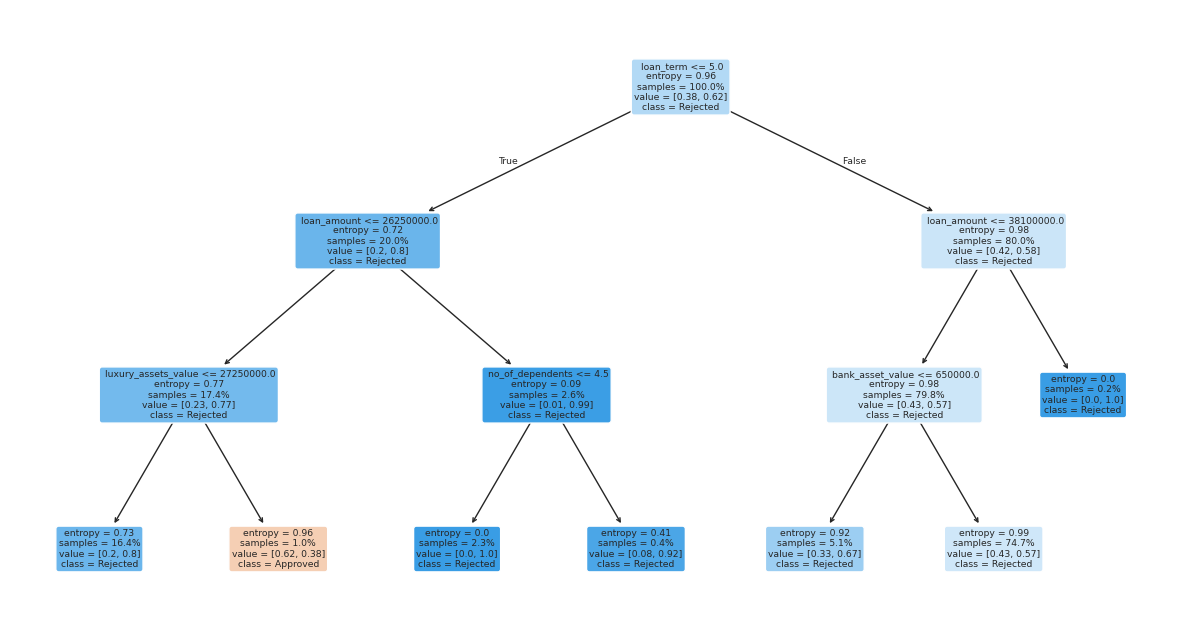

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42, criterion='entropy')
best_tree.fit(X_train, y_train)
plot_tree(best_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Approved', 'Rejected'],
          proportion=True,
          rounded=True,
          precision=2)
plt.show()

# **The greatest influence on the granting of a loan is the cibil score**
